# Proof of Concept: Contrast-Based Insect Segmentation

This notebook demonstrates a proof of concept for segmenting insects from images using traditional image processing techniques. The approach leverages the contrast between insects and the background, employing grayscale or HSV conversion, thresholding, and morphological operations to isolate the insects.

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Step 1: Load and Preprocess the Image

The first step involves loading the image and converting it to a format that simplifies the detection of insects based on contrast.

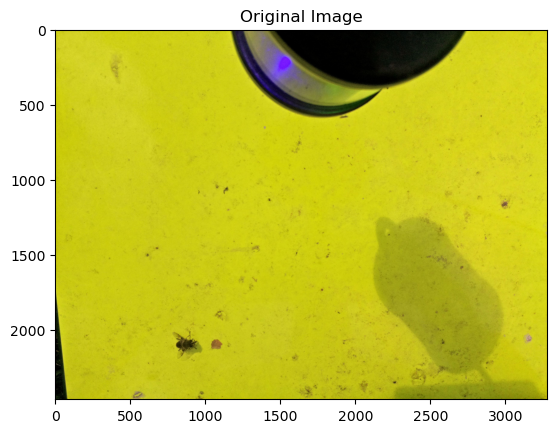

In [29]:
# Load an image
image_path = 'data/test2.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.title('Original Image')
plt.show()

## Step 2: Grayscale Conversion and Thresholding

Converting the image to grayscale simplifies the process of identifying contrast differences. Thresholding then isolates the darker or lighter areas, presumed to be insects.

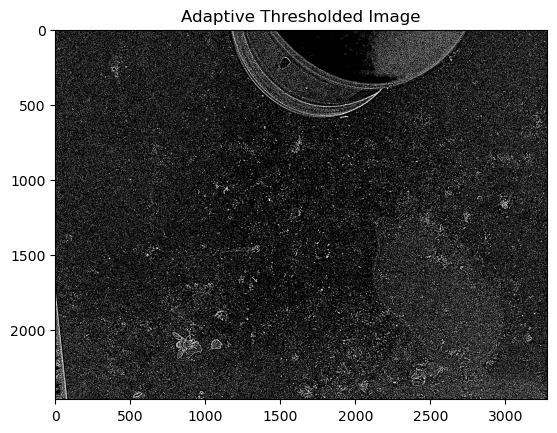

In [30]:
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Convert to grayscale
gray_image = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Apply adaptive threshold
thresholded = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, 11, 2)

# Display the thresholded image
plt.imshow(thresholded, cmap='gray')
plt.title('Adaptive Thresholded Image')
plt.show()

## Step 3: Morphological Operations

Morphological operations like erosion and dilation are used to refine the shapes of detected insects, removing noise and small irrelevant details.


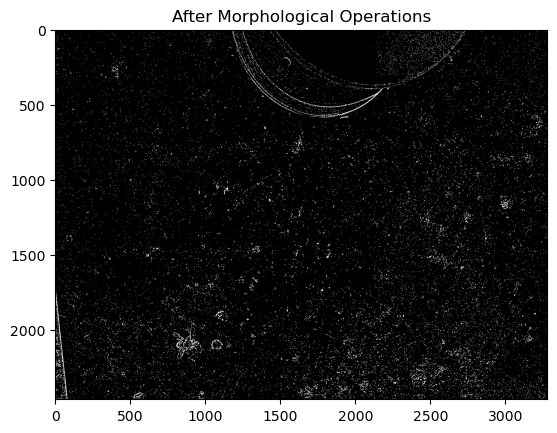

In [77]:
# Define kernel size for morphological operations
kernel = np.ones((2, 2), np.uint8)

# Perform opening to remove noise
cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=2)

# Display the result after morphological operations
plt.imshow(cleaned, cmap='gray')
plt.title('After Morphological Operations')
plt.show()


## Step 4: Extracting and Saving Insects

After isolating the insects, the next step involves extracting these areas and optionally saving them for further analysis.

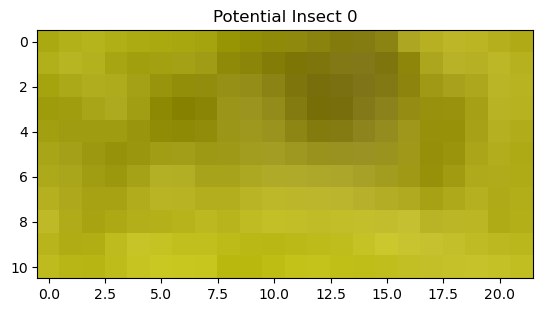

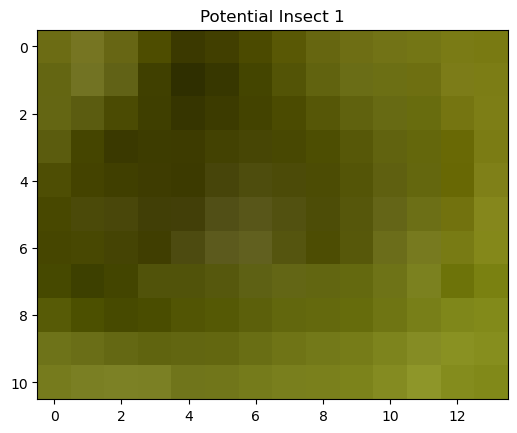

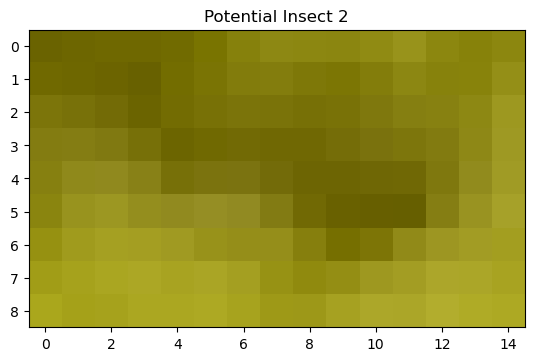

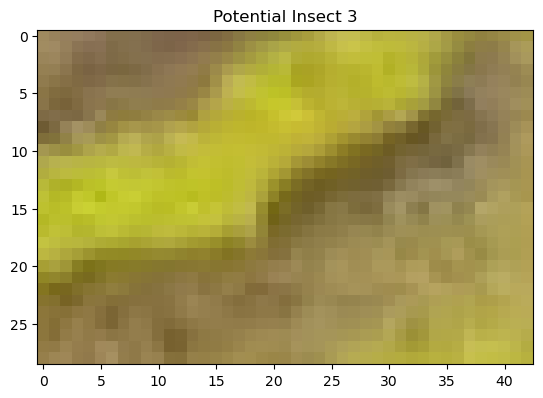

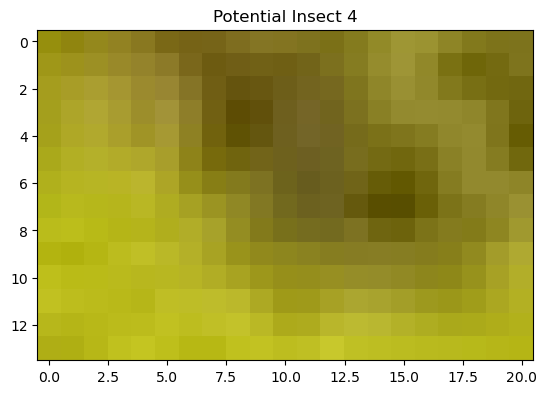

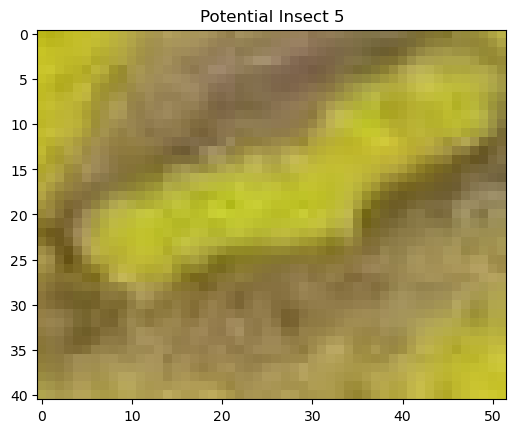

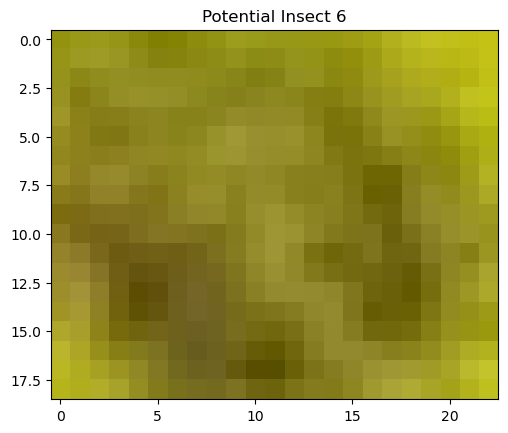

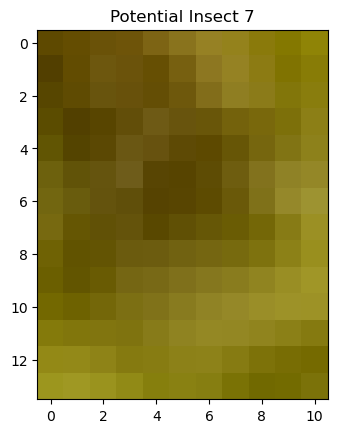

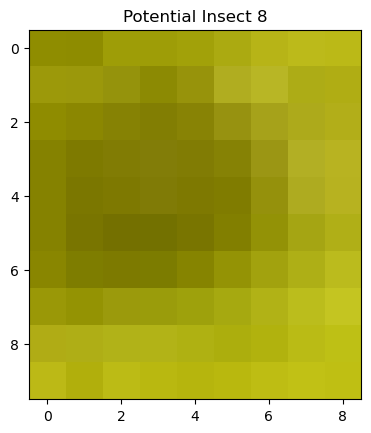

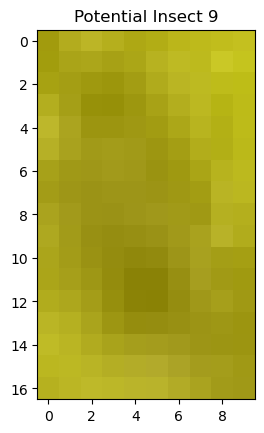

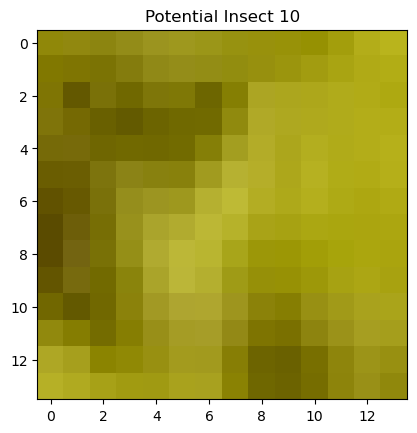

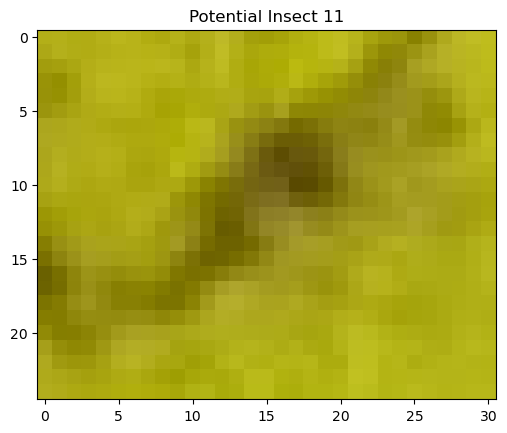

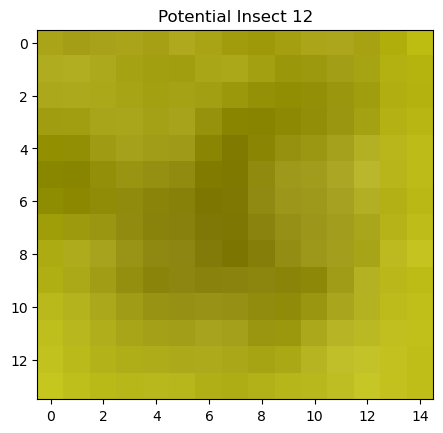

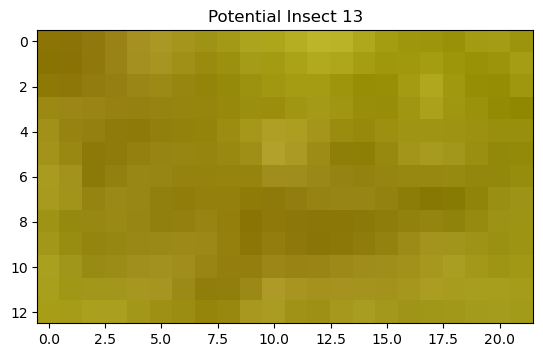

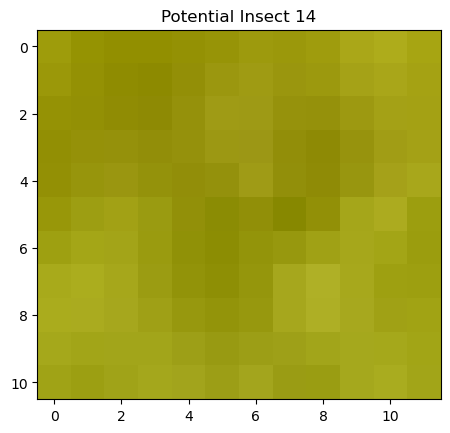

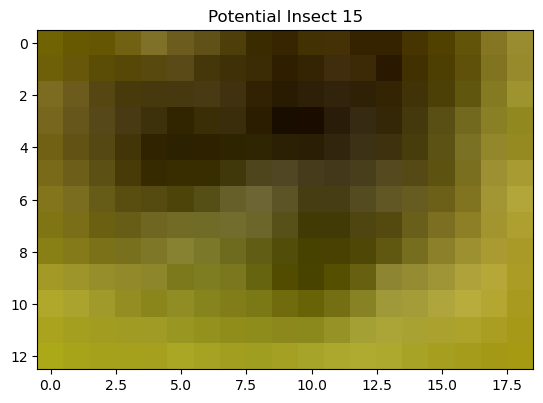

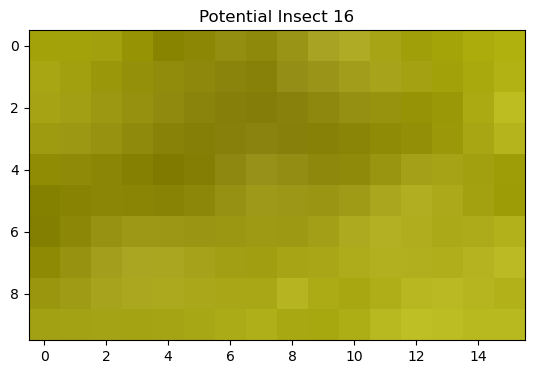

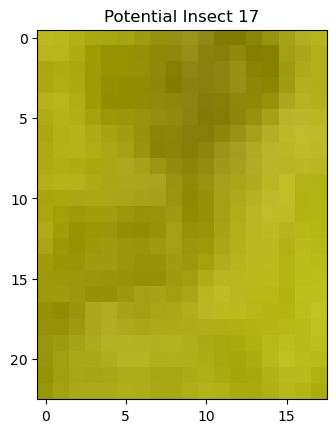

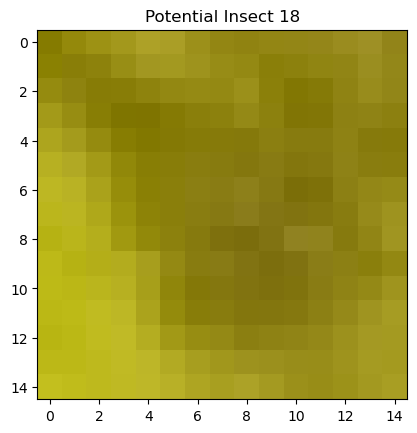

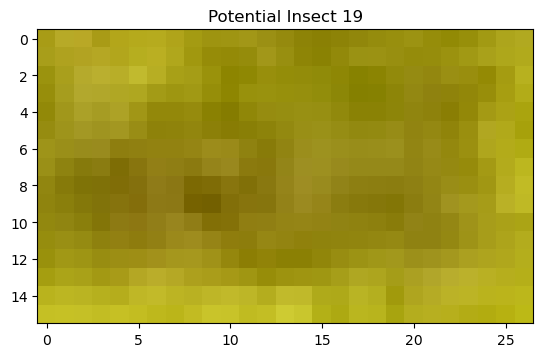

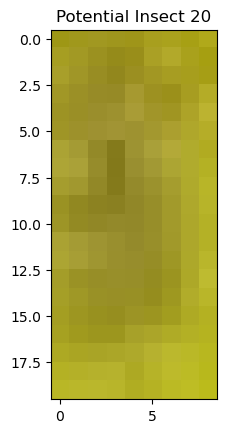

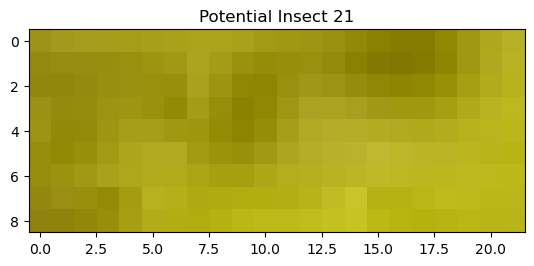

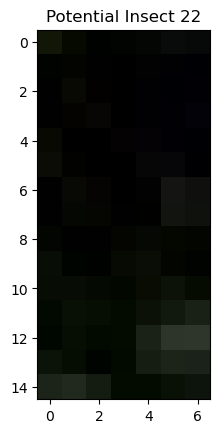

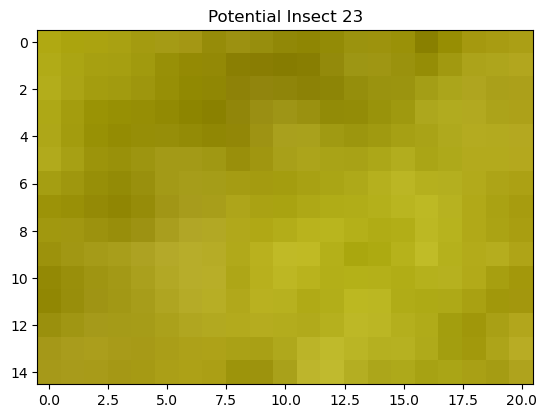

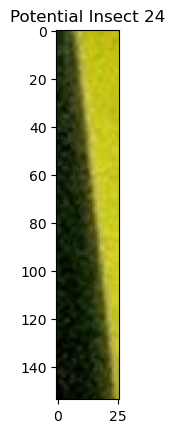

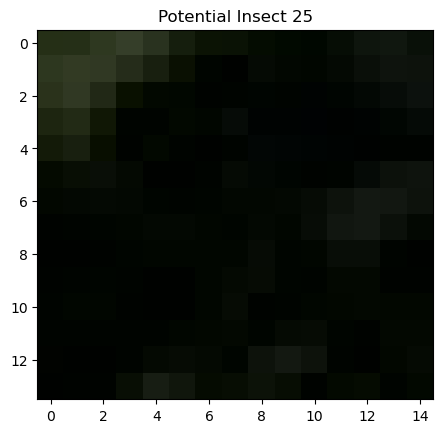

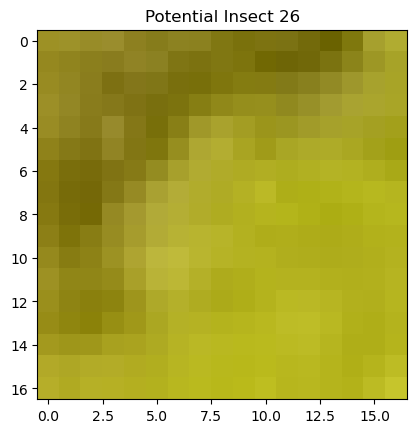

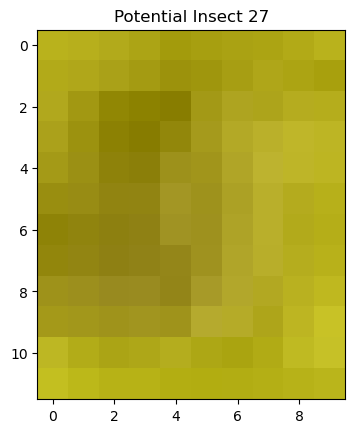

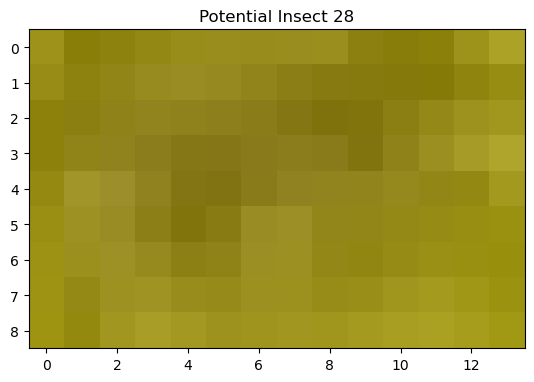

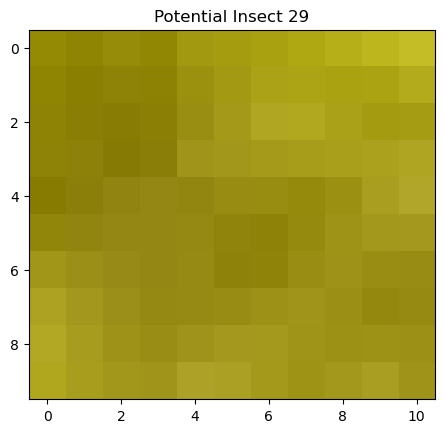

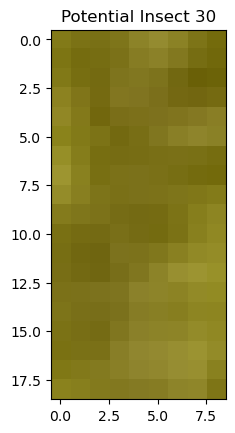

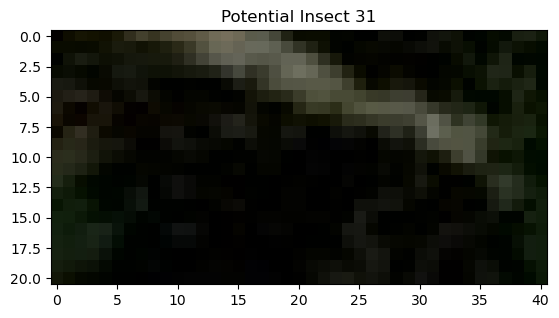

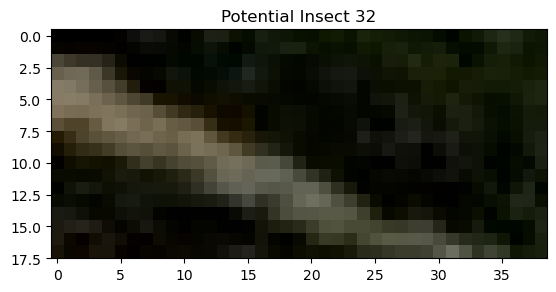

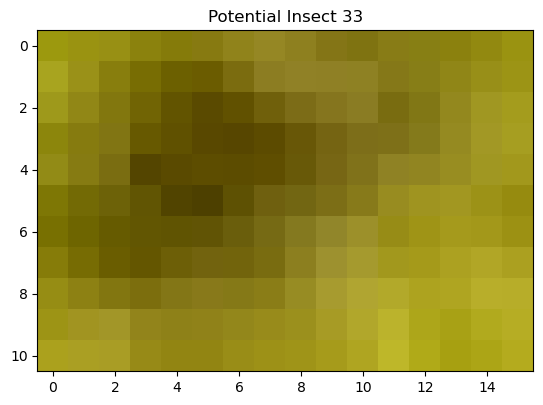

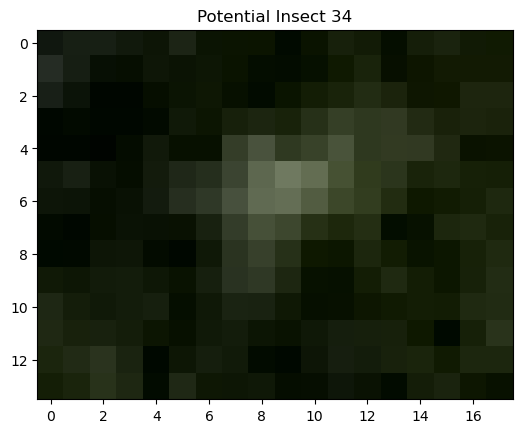

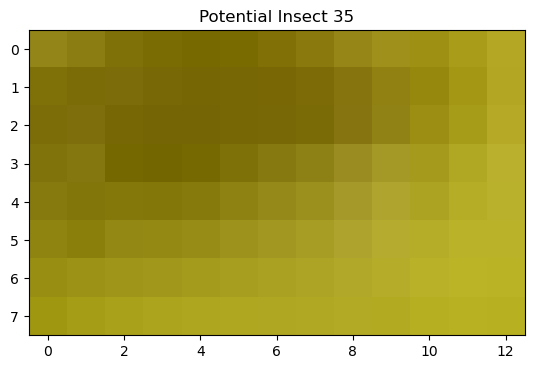

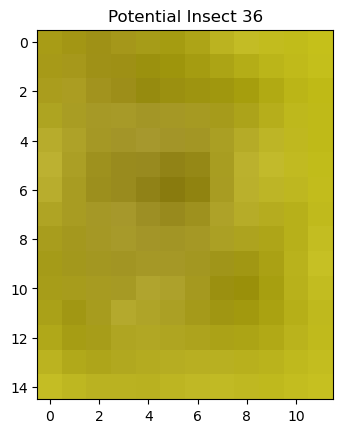

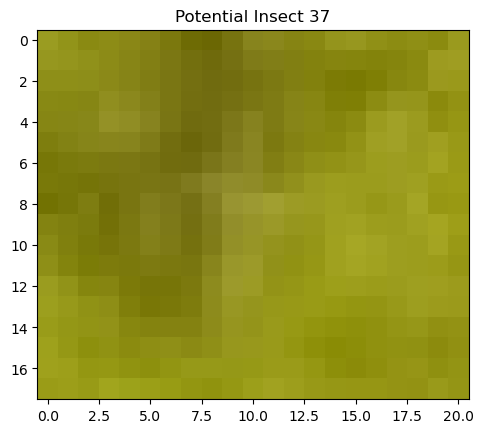

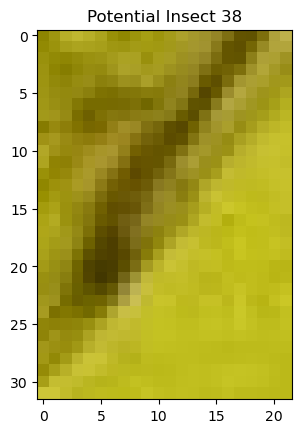

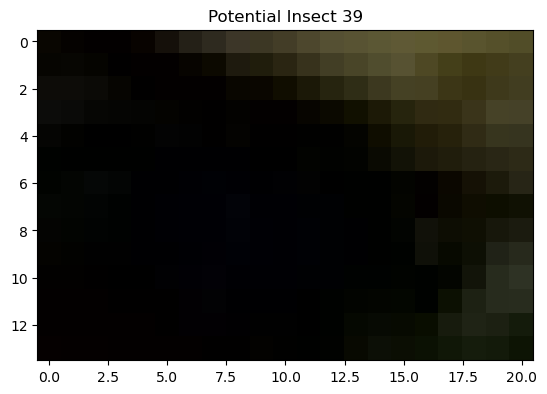

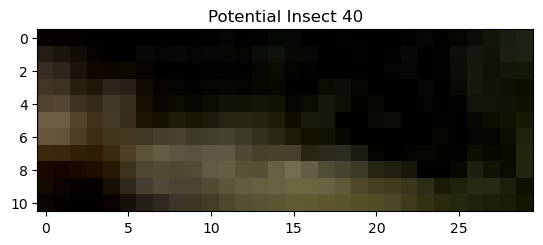

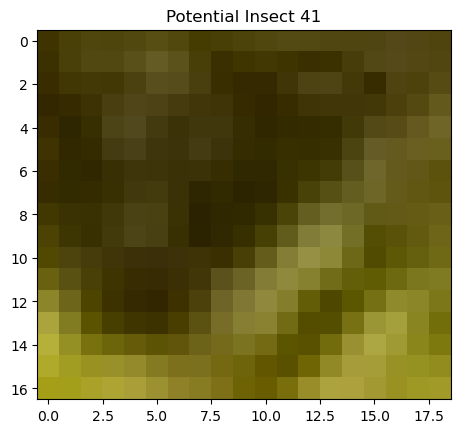

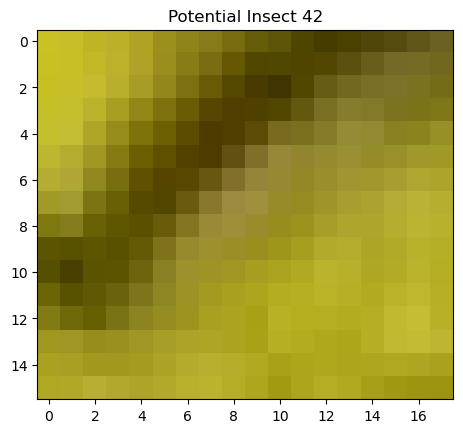

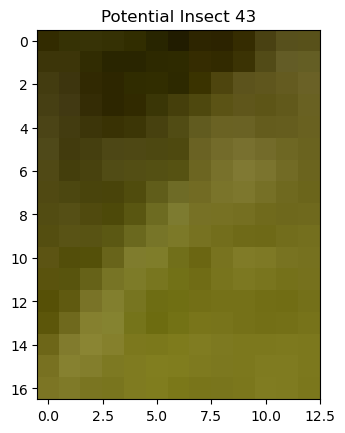

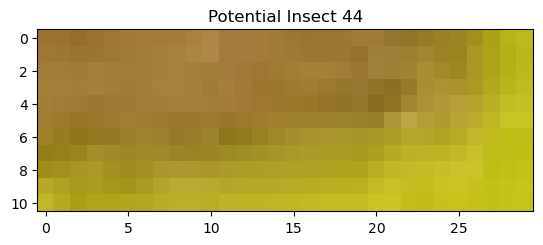

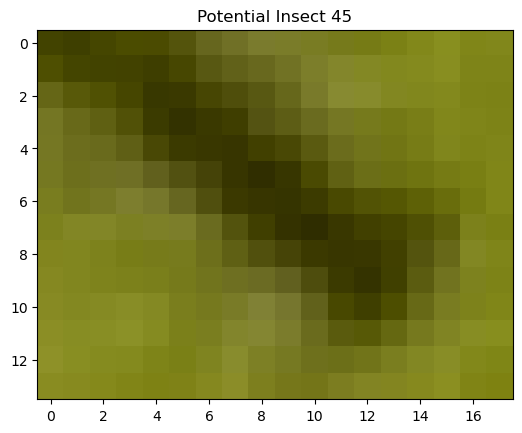

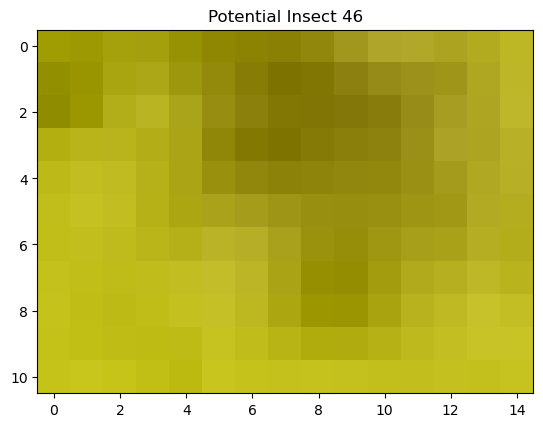

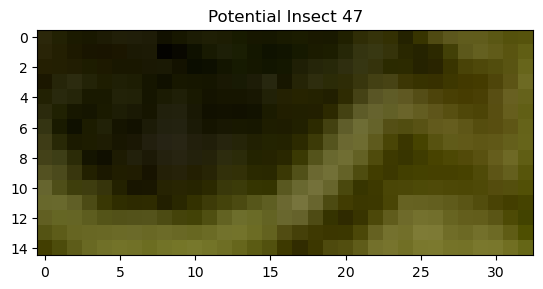

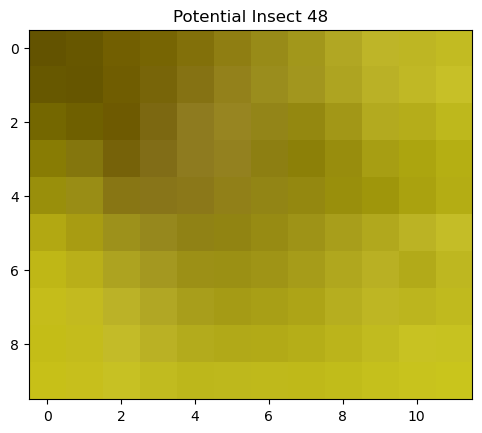

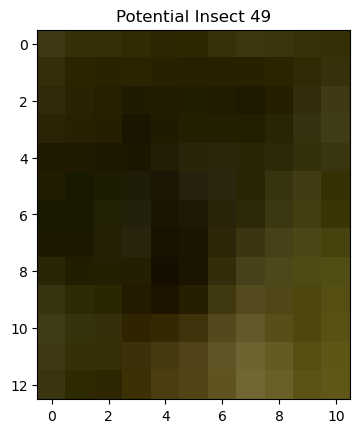

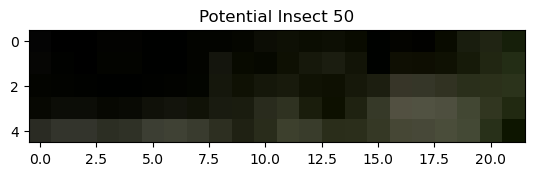

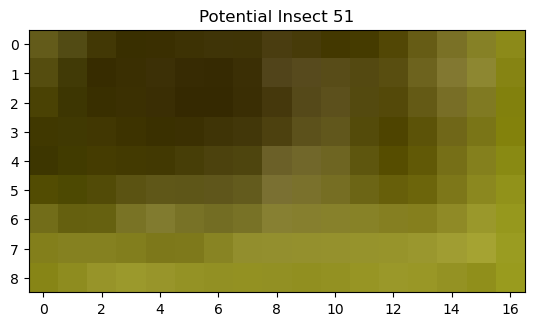

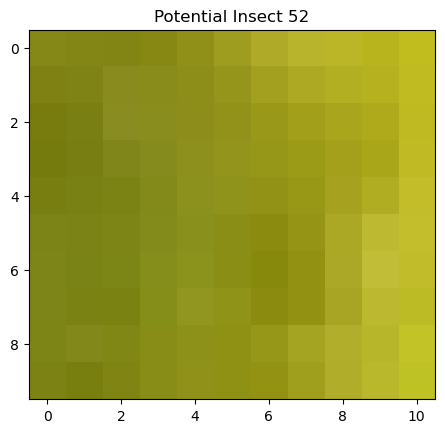

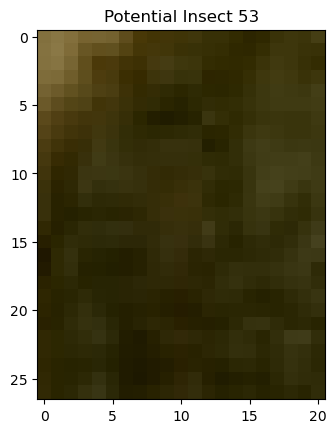

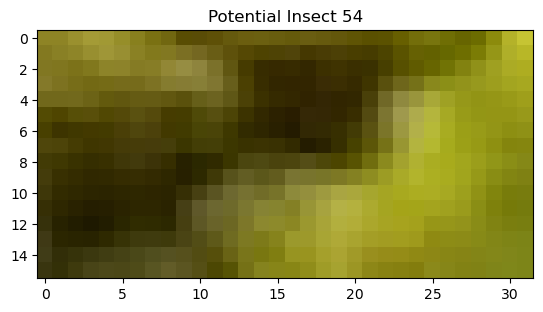

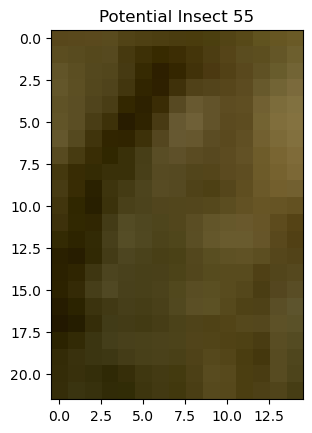

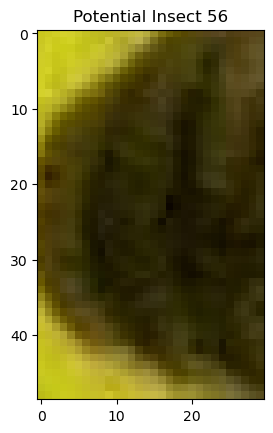

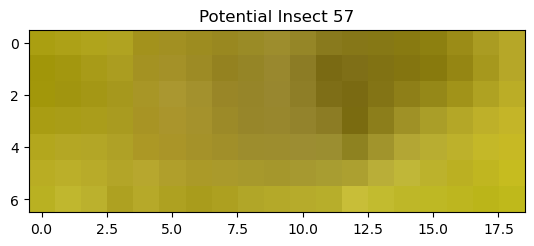

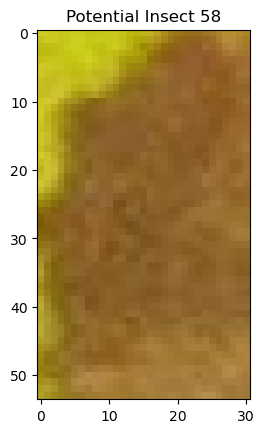

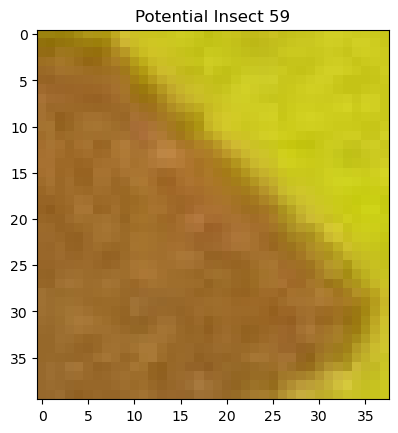

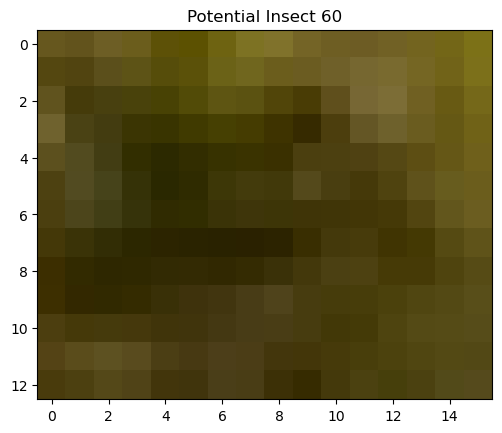

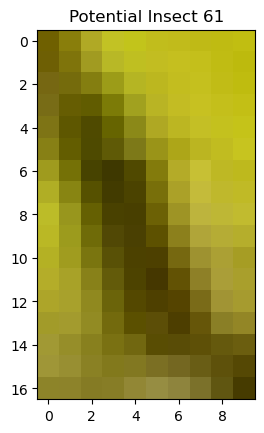

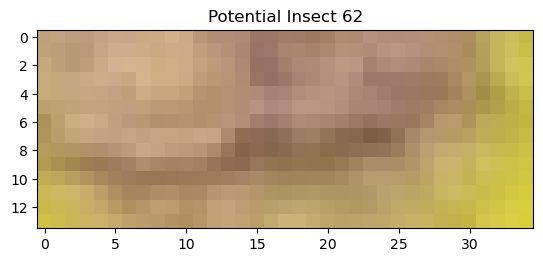

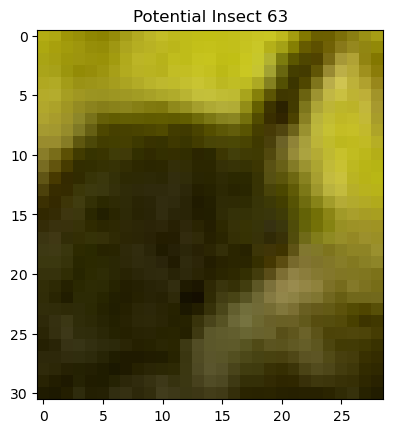

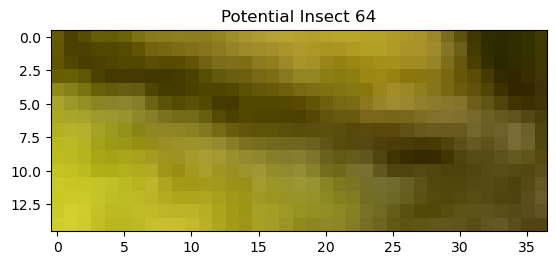

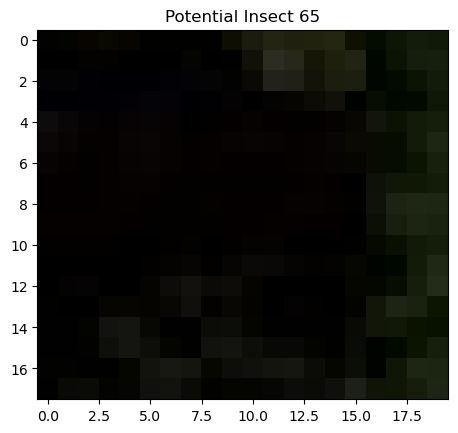

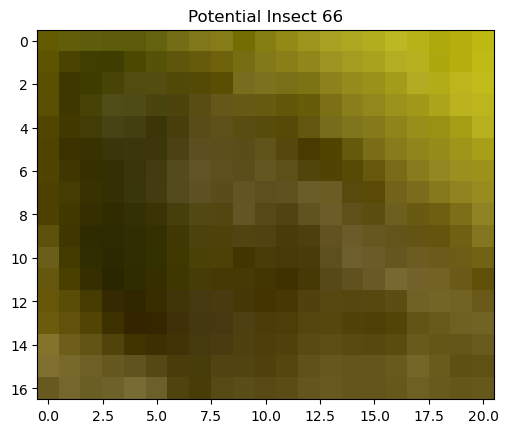

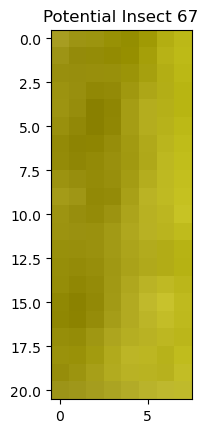

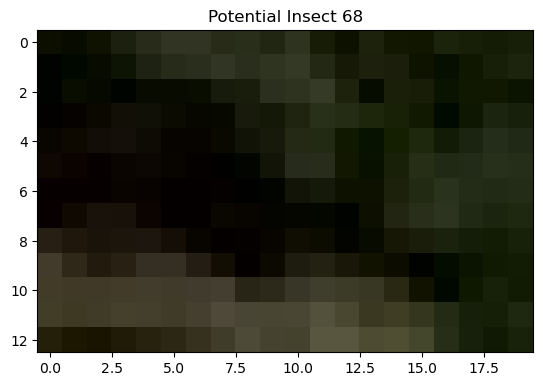

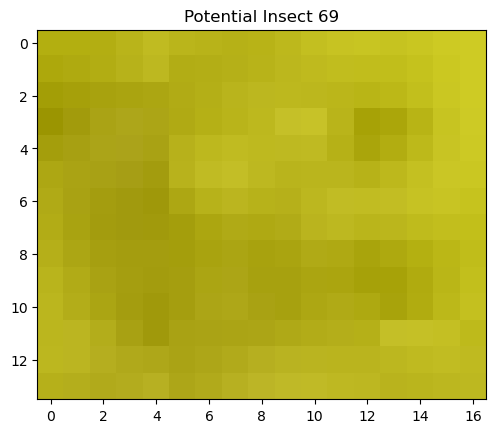

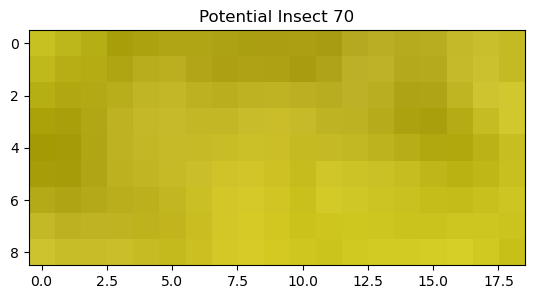

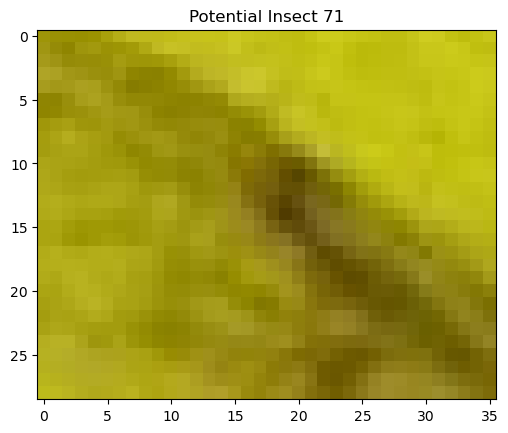

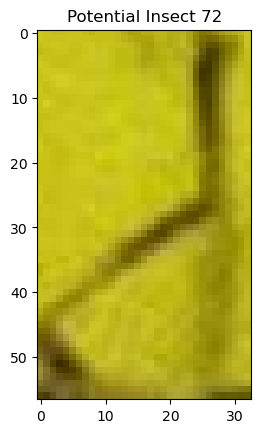

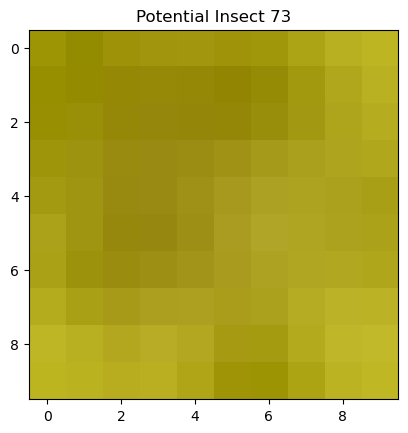

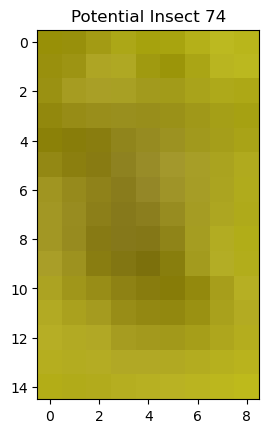

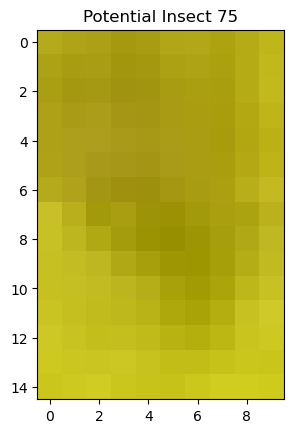

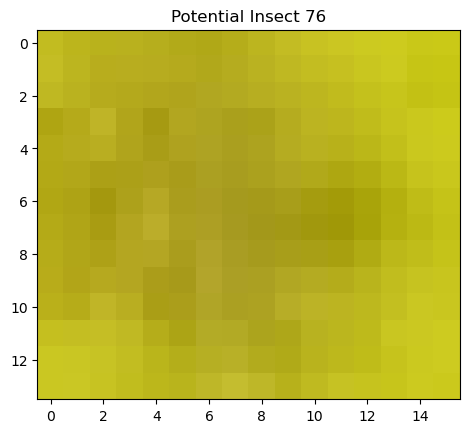

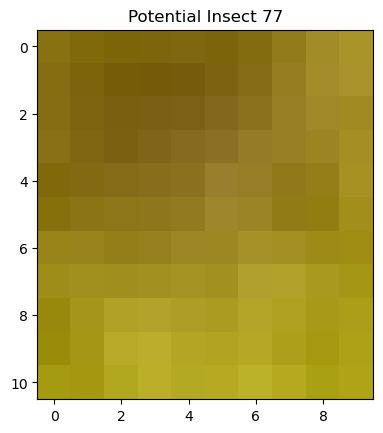

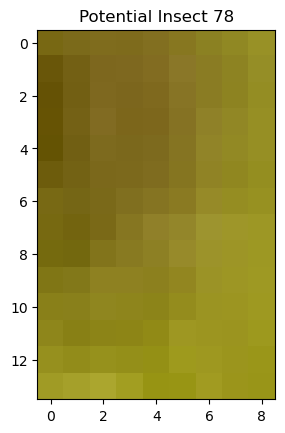

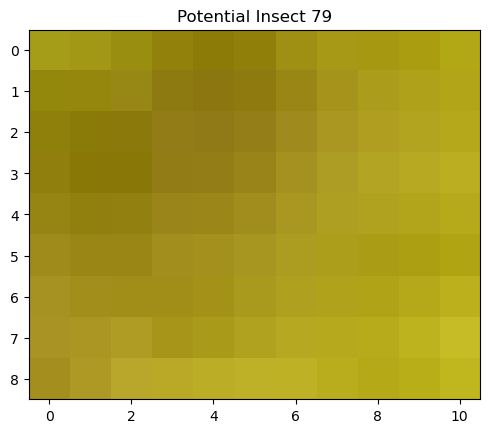

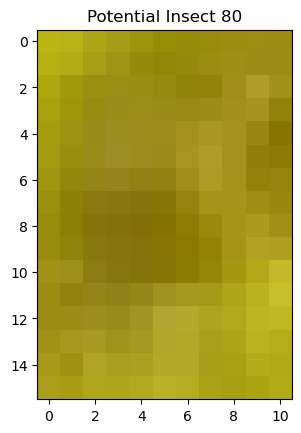

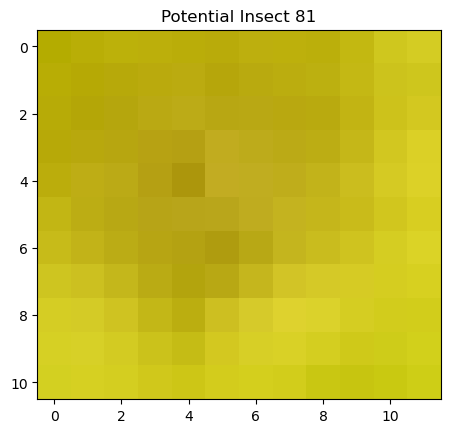

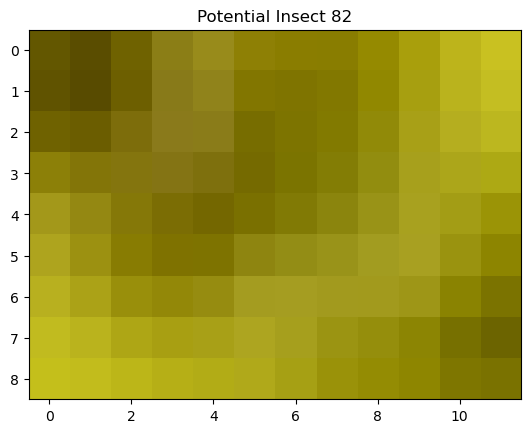

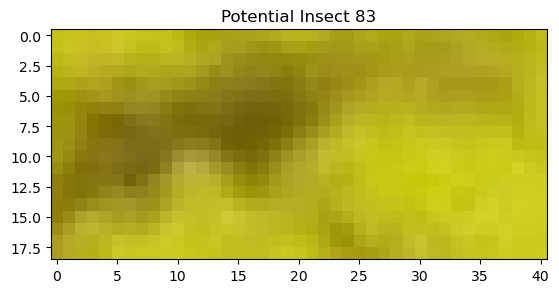

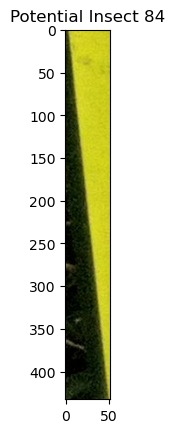

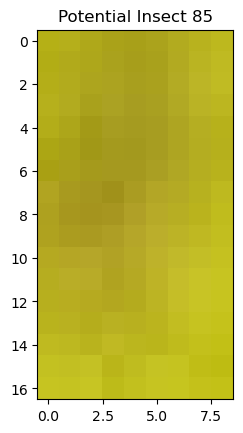

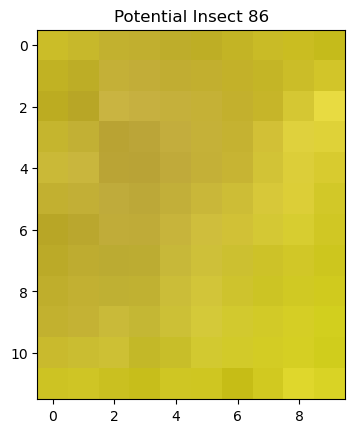

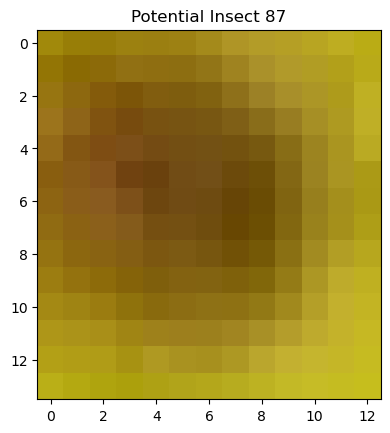

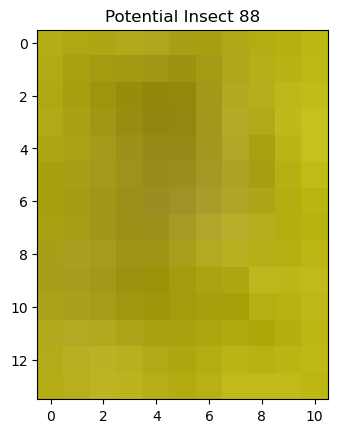

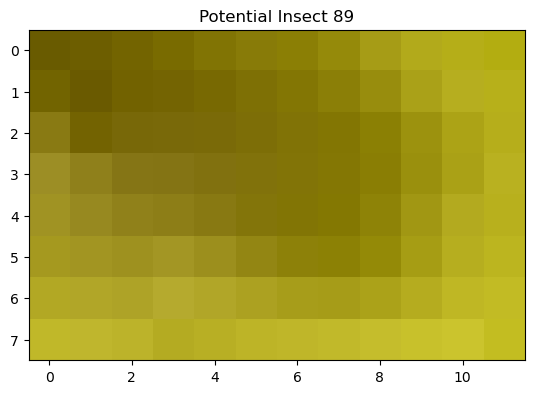

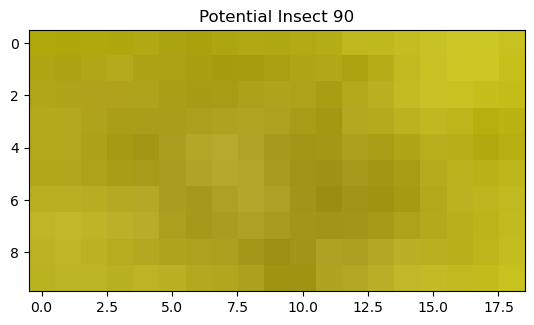

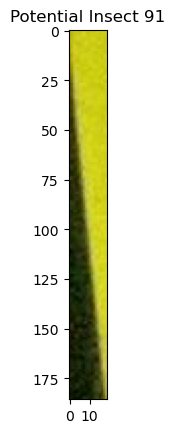

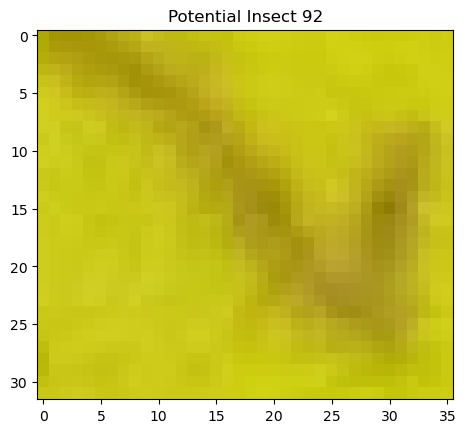

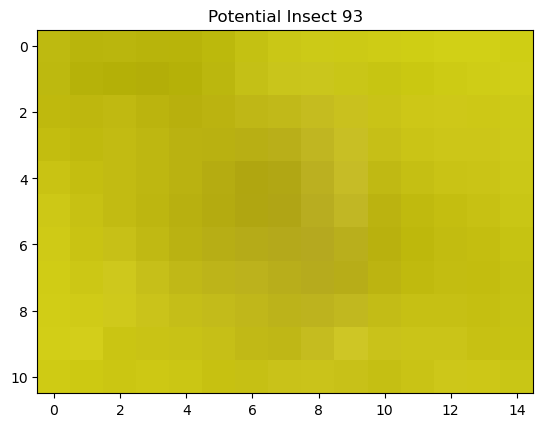

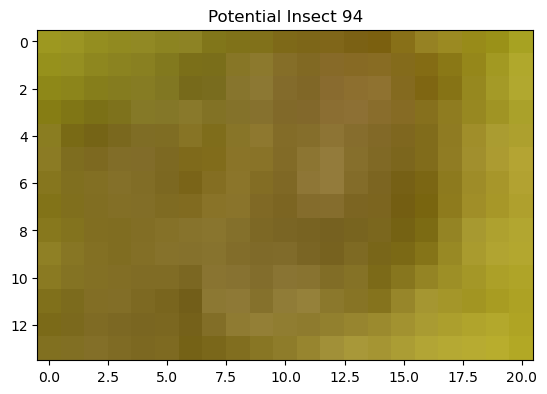

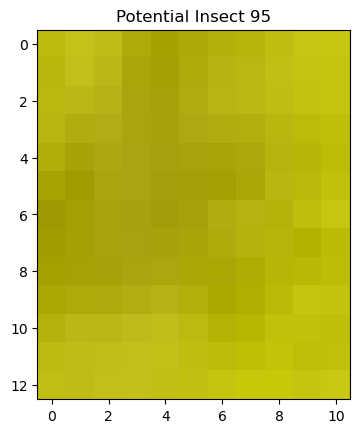

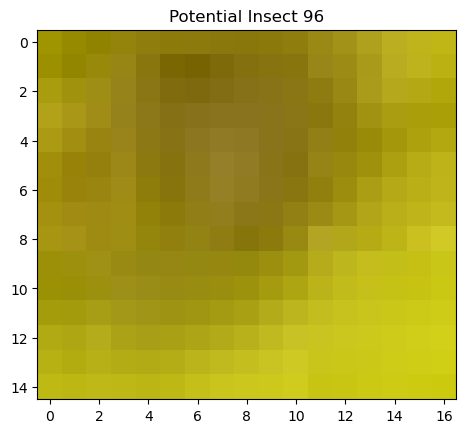

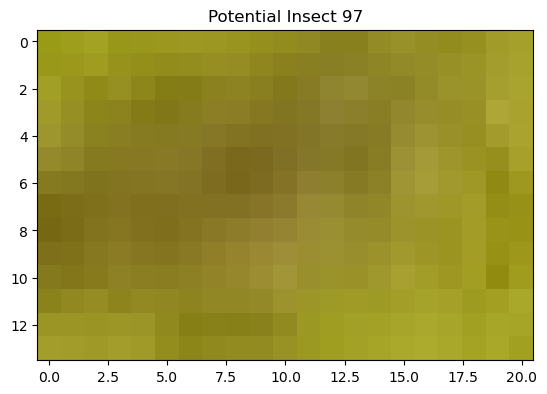

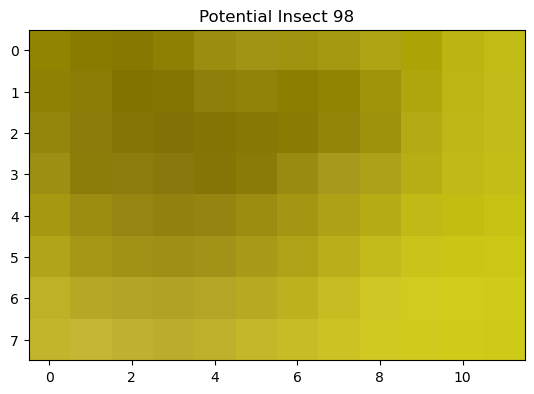

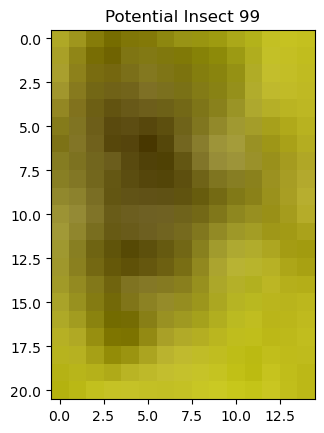

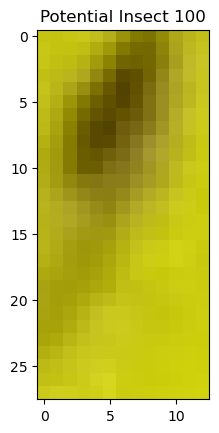

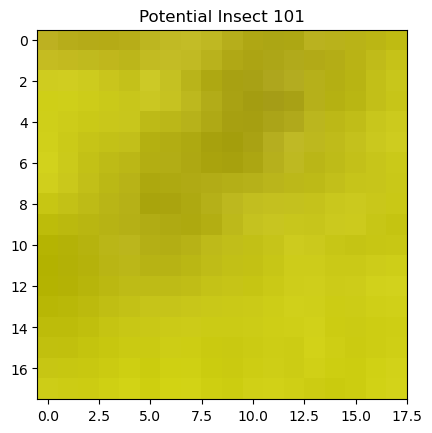

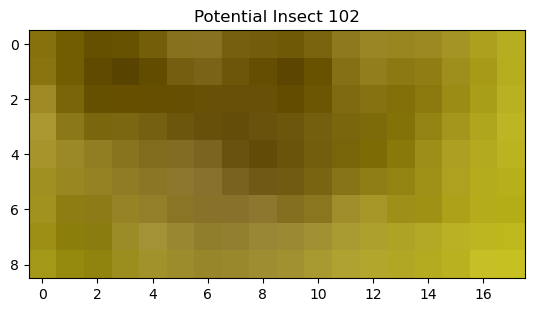

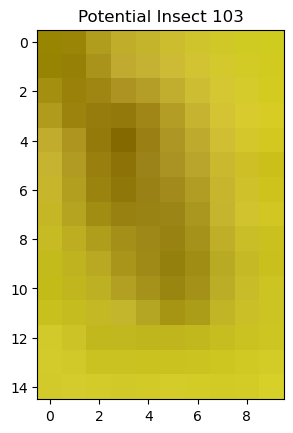

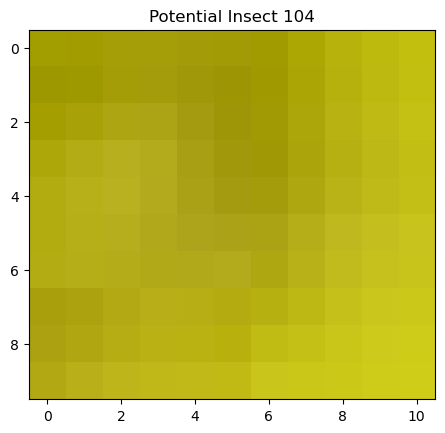

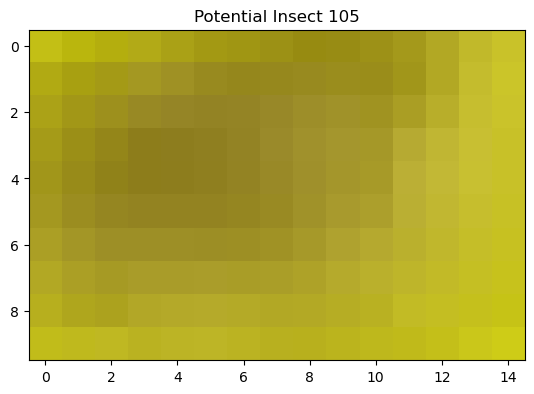

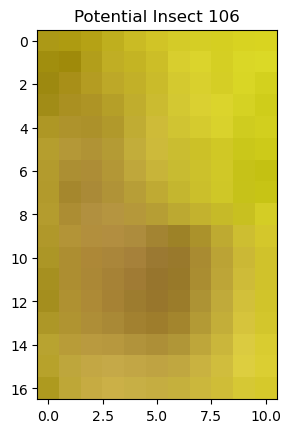

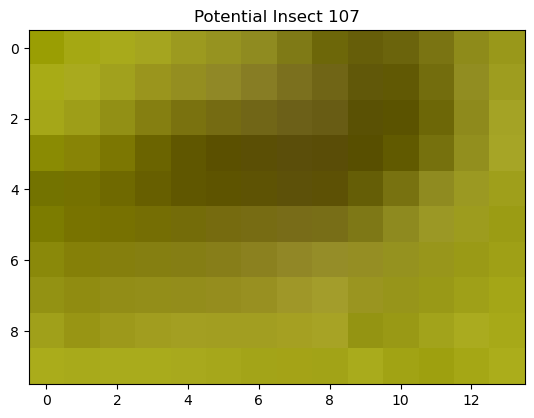

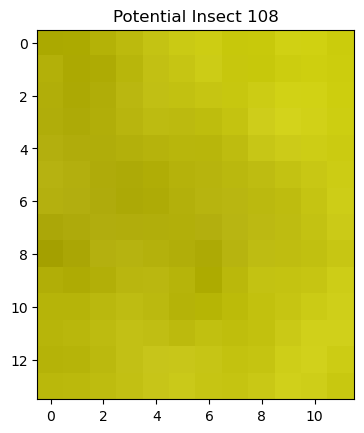

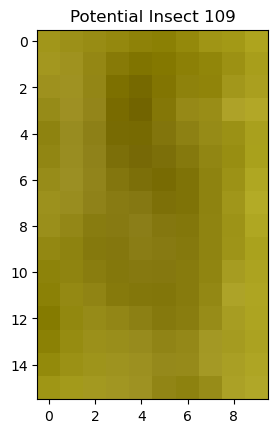

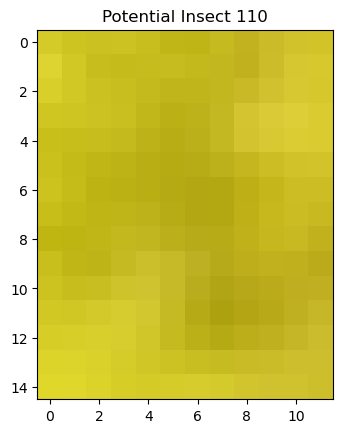

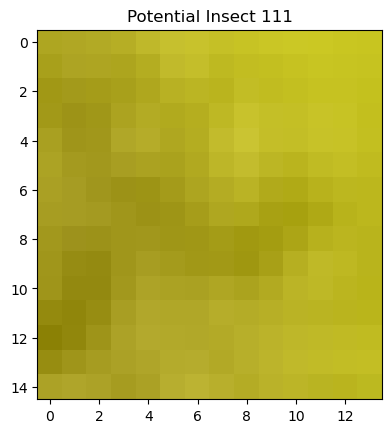

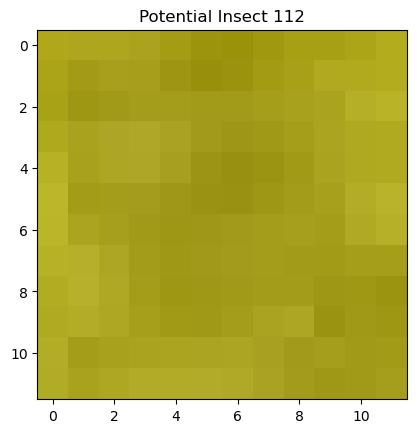

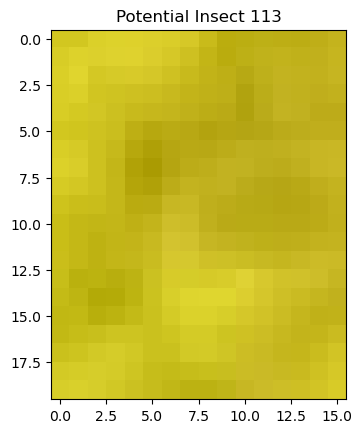

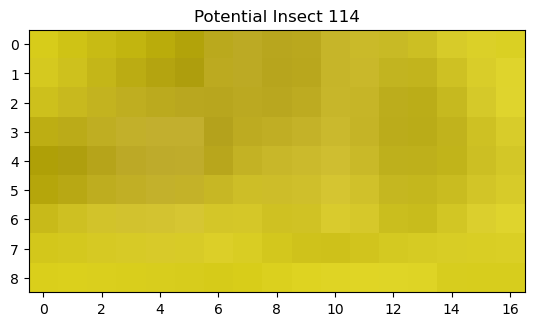

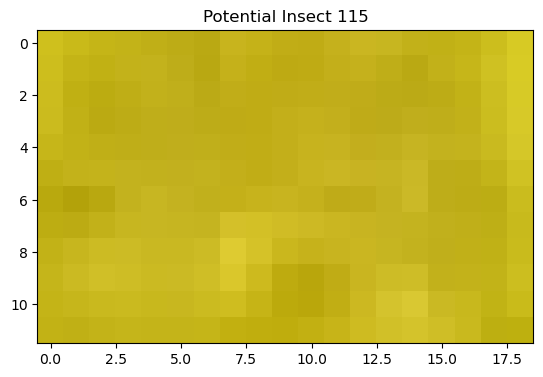

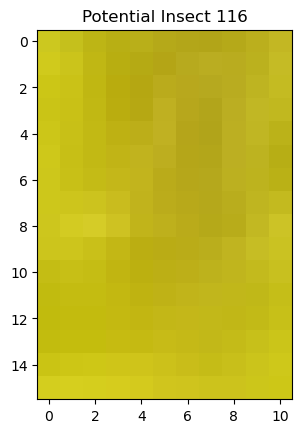

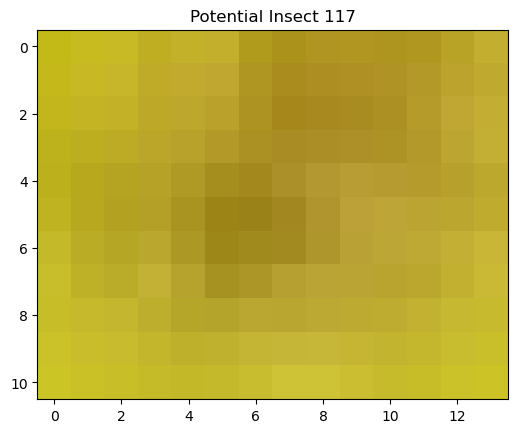

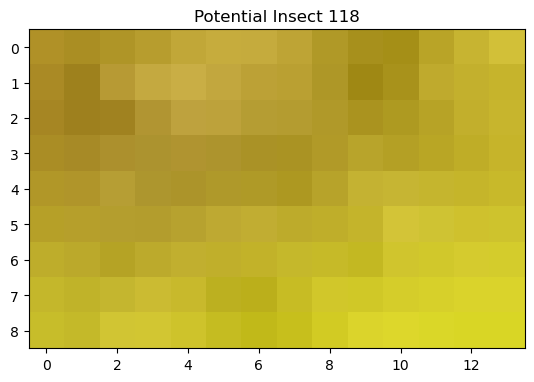

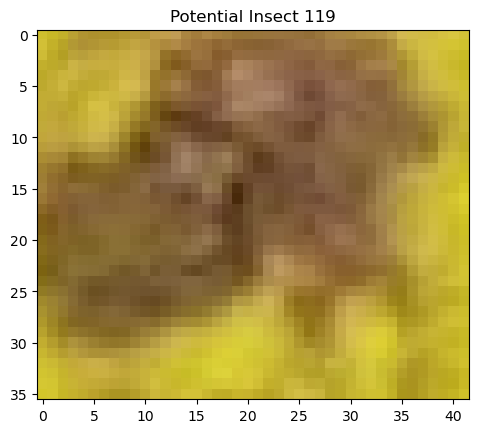

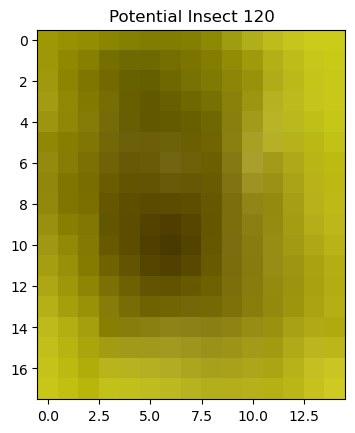

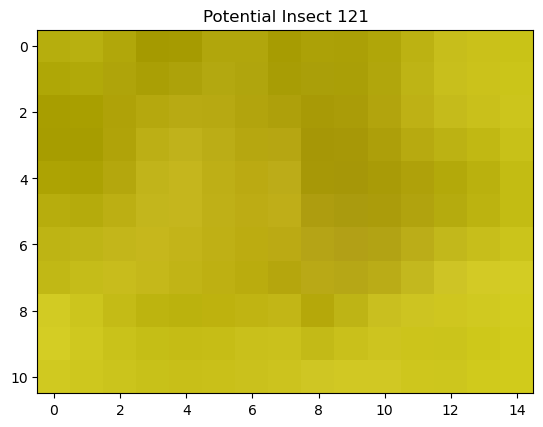

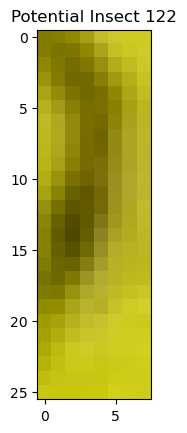

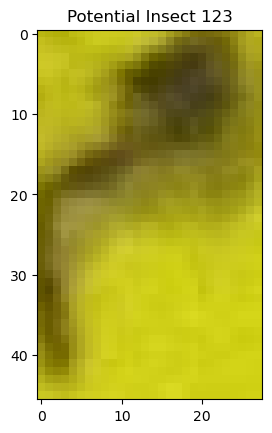

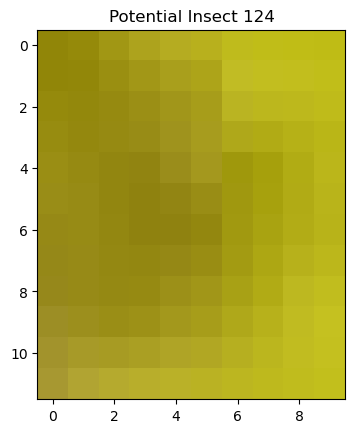

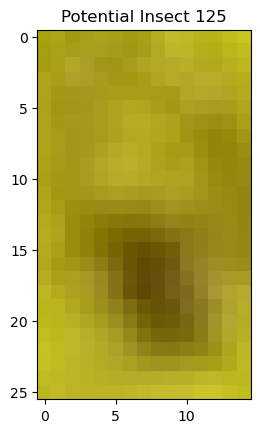

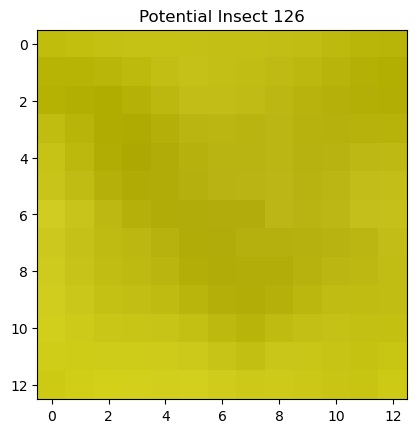

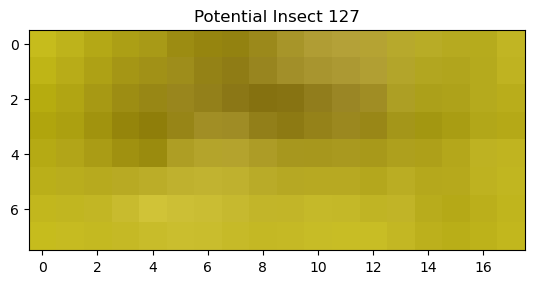

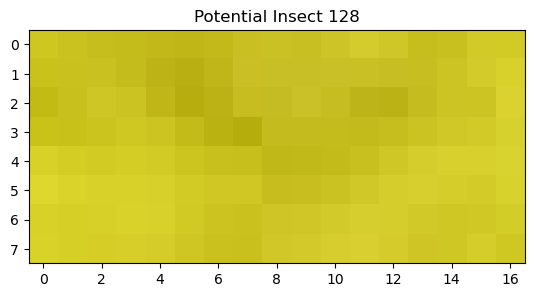

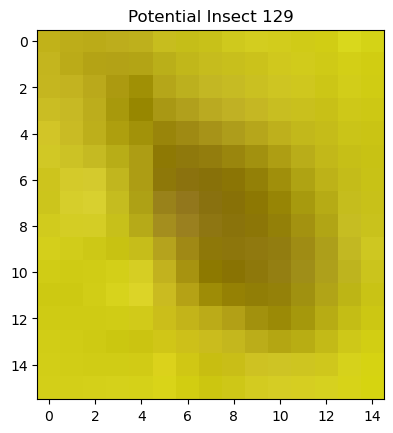

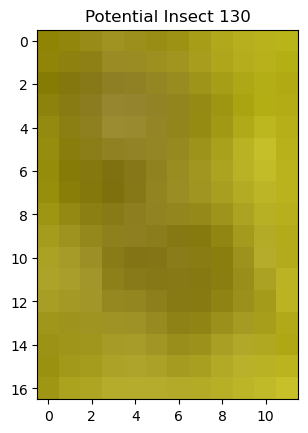

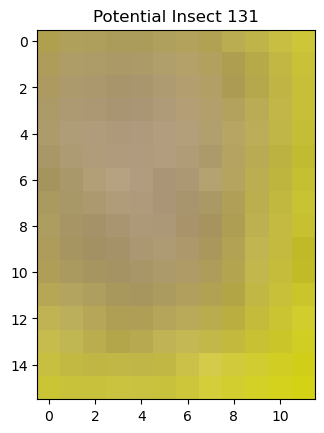

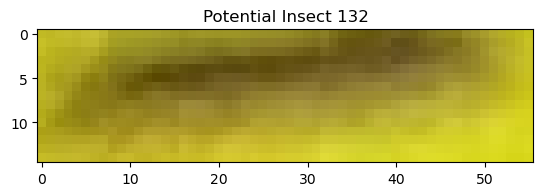

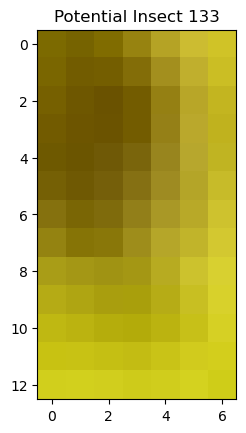

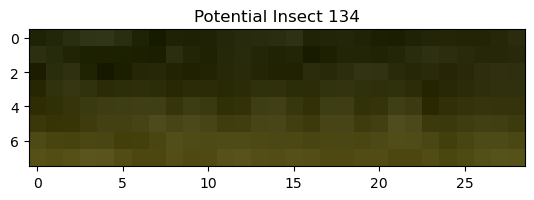

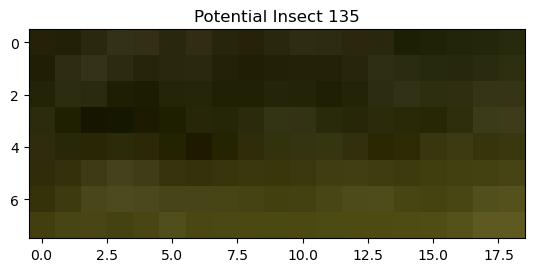

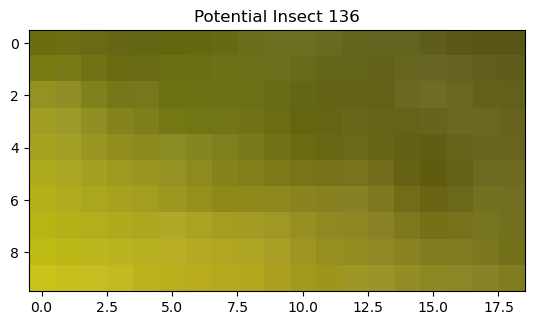

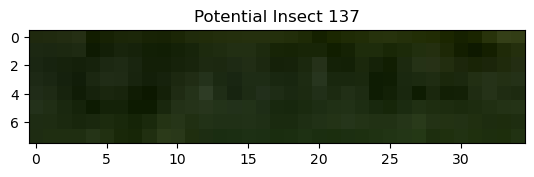

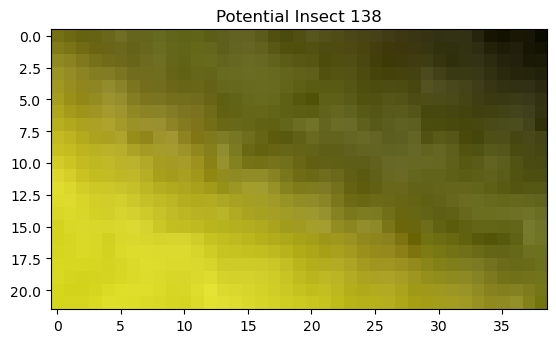

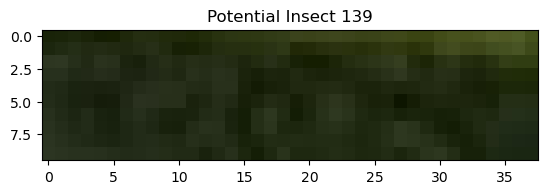

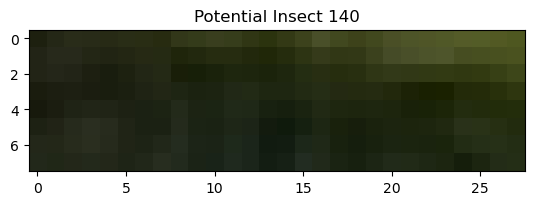

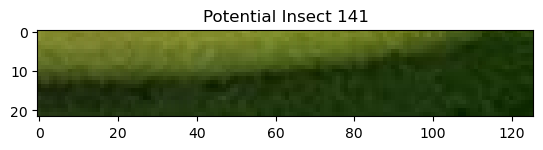

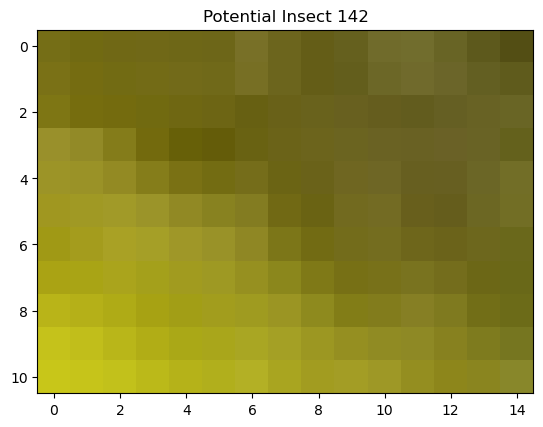

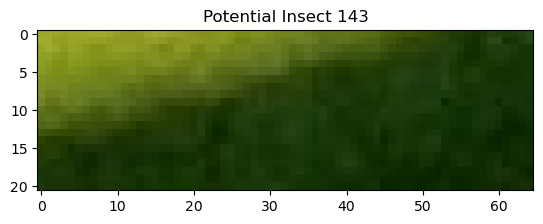

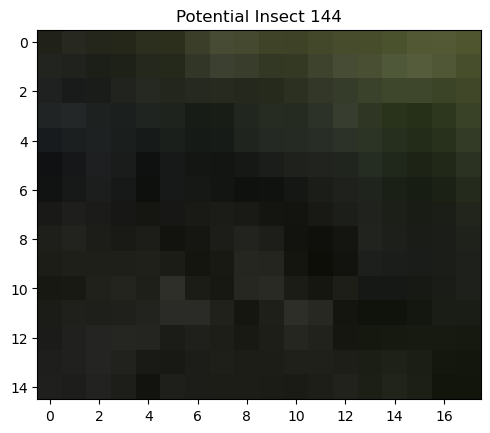

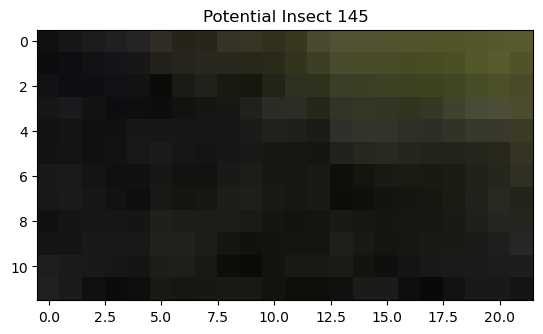

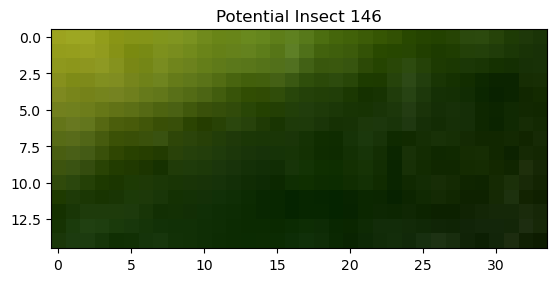

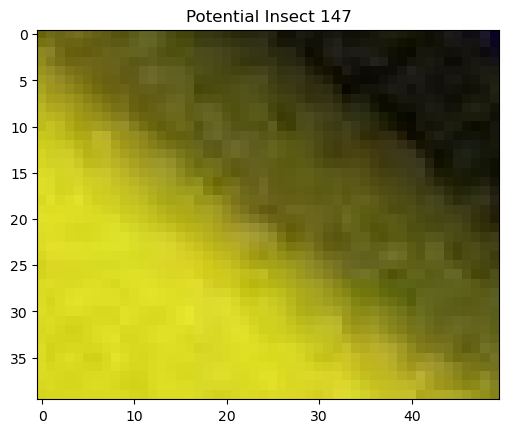

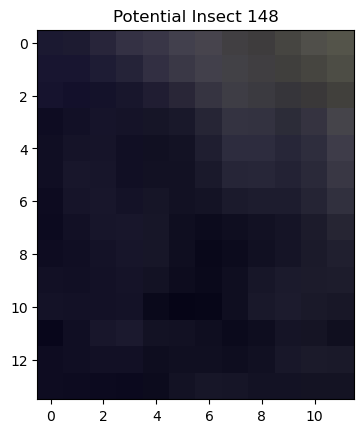

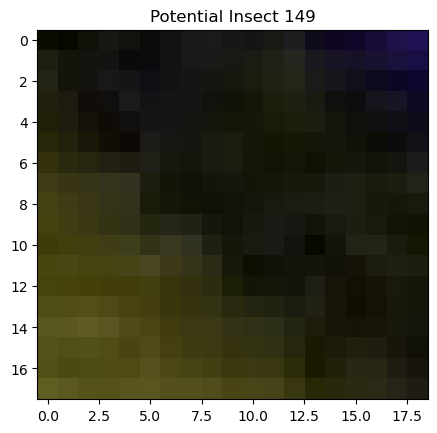

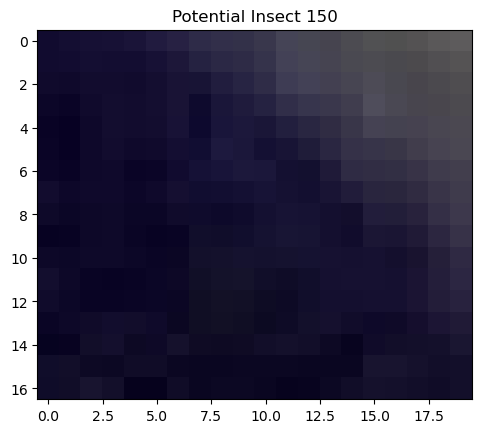

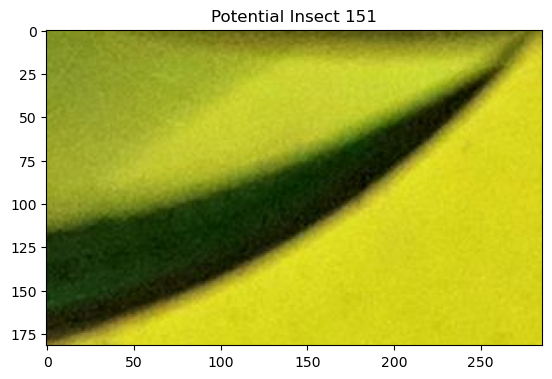

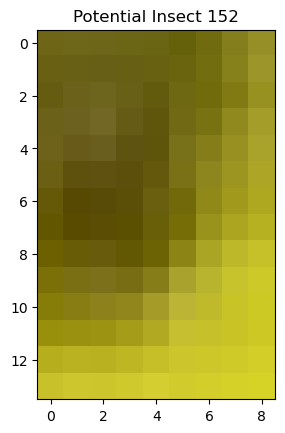

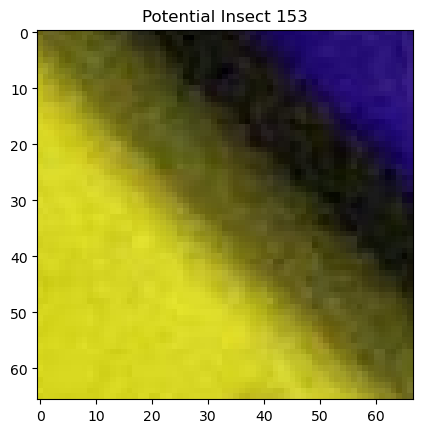

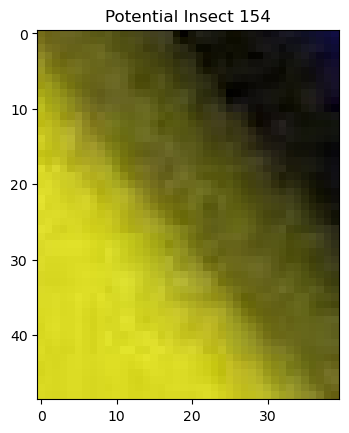

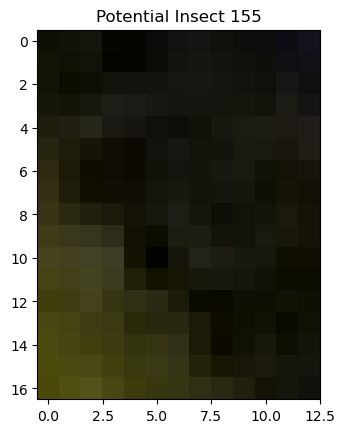

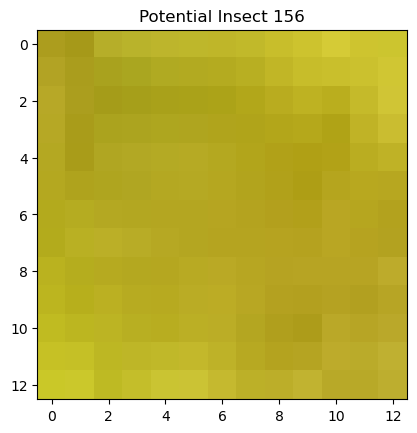

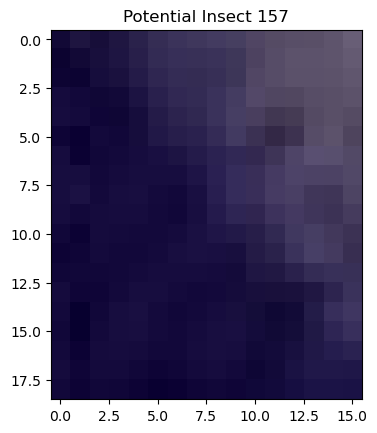

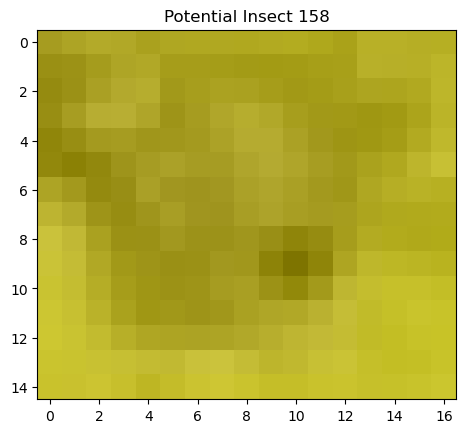

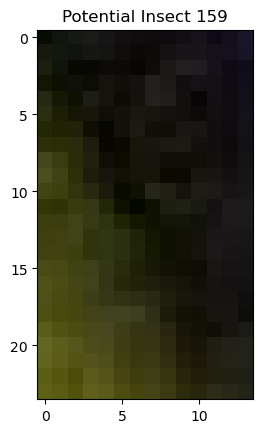

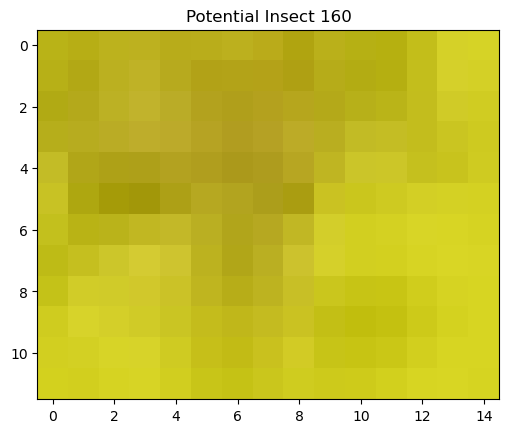

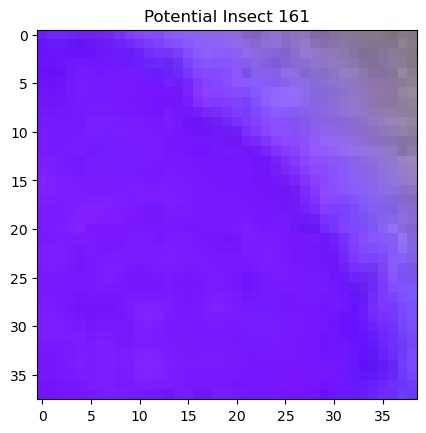

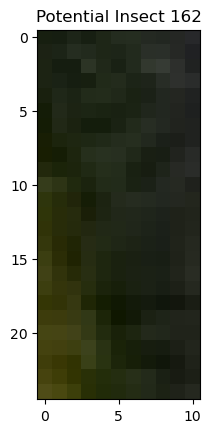

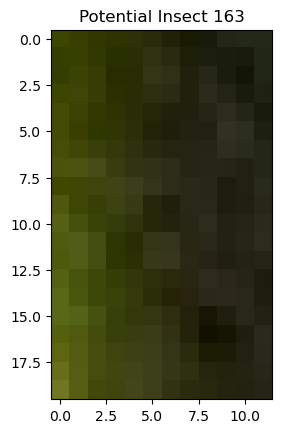

In [80]:
# Find contours on the cleaned image
contours, _ = cv2.findContours(cleaned.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Set minimum and maximum area sizes for detected insects
min_area = 50 
max_area = 15000

# Filter out contours that don't meet the area criteria
filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

# Check if there are any contours found
if not filtered_contours:
    print("No contours found that match the criteria. Please adjust the area thresholds.")
else:
    # Crop and save the detected insects
    for i, contour in enumerate(filtered_contours):
        x, y, w, h = cv2.boundingRect(contour)
        cropped_insect = image[y:y+h, x:x+w]
        cv2.imwrite(f'/mnt/data/cropped_insect_{i}.jpg', cropped_insect)

        # Displaying the cropped insects (optional)
        plt.figure()
        plt.imshow(cv2.cvtColor(cropped_insect, cv2.COLOR_BGR2RGB))
        plt.title(f'Potential Insect {i}')
        plt.show()

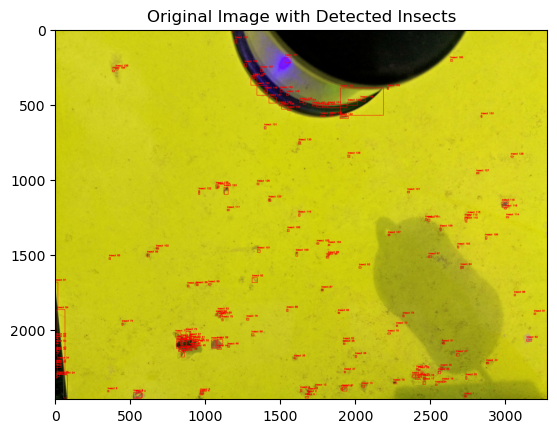

In [81]:
# Make a copy of the original image to draw on
image_with_boxes = image_rgb.copy()

# Loop over the filtered contours and draw bounding boxes with labels
for i, contour in enumerate(filtered_contours):
    x, y, w, h = cv2.boundingRect(contour)
    # Draw rectangle on the copy of the image
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (255, 0, 0), 2)
    # Put the label on the image
    cv2.putText(image_with_boxes, f"Insect {i}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the original image with detected insects outlined
plt.imshow(image_with_boxes)
plt.title('Original Image with Detected Insects')
plt.show()